# Trabalho Final de Machine Learning
### Aluno: Alexandre Quinto

**Arquivos de Apoio**

GT Train.xlsx - Base de dados do exercicio 1  
Churn Train.xlsx - Base de dados do exercicio 2  
Trabalho Final - Machine Learning Fundamentals.pdf

**Instruções**  
Ao rodar o notebook ele executará todos os procedimentos necessários bastando alterar apenas a variávei global "home" com o caminho para os arquivos de dados. **Não esquecer de escapar a string '\\'.**  
As variáveis **gt_train** e **churn_train** contém o arquivos XLSX com os dados.

**IMPORTANTE**
Todas as bibliotecas foram atalizadas para suas últimas versões por conta do pacote de metricas MAPE, inclusive a sklearn que precisaestar na versão 0.24.1.
Para forçar a atualização utilizar os procedimentos descritos em https://anaconda.org/conda-forge/scikit-learn  
Se deseja utilizar os pacotes stardard sem esse upgrade, remover a metrica MAPE (só existe naversão 0.24)

## Instalação das bibliotecas utilizadas
Obs: Essa etapa pode ser executada apenas uma vez.

In [ ]:
!pip install pandas
!pip install xlrd
!pip install openpyxl 
!pip install numpy
!pip install matplotlib
!pip install seaborn
# requerido ver 0.24.1
!pip install sklearn
#!pip install lightgbm

## Questão 1) Predição de Emissões em Turbina a Gás (2.5 pts)

Posto esse problema, o programador deve desenvolver um sistema utilizando aprendizado de máquinas para equipar o computador de bordo das aeronaves que envia em tempo real os dados estimados das emissões de CO e NOx de cada turbina para a central de manutenção da companhia aérea. A companhia forneceu ao programador o dataset GT Train com dados de
experimentos em diversas condições de operação com suas turbinas em solo.  

## Importação das bibliotecas e variáveis globais 


In [ ]:
# bibliotecas
import pandas as pd
pd.options.display.float_format = '{:,.2f}'.format #configurando casas decimais
import numpy as np
#somente para o notebook
%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as snb
from sklearn.model_selection import train_test_split
from sklearn import model_selection 
from sklearn import metrics
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.svm import NuSVR
from sklearn import linear_model
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

#variaveis glboais
home = 'C:\\Users\\saccacio\\OneDrive - Lojas Americanas\\03 - Pessoal\\Outros\\4. Machine Learning Fundamentals\\trabalho_final\\'
#arquivo de treino
gt_train = home + 'GT Train.xlsx'

#separando as features e labels
feat_x = ['Ambient temperature', 'Ambient pressure', 'Ambient humidity', 'Air filter difference pressure', 
          'Gas turbine exhaust pressure', 'Turbine inlet temperature', 'Turbine after temperature',
          'Turbine energy yield', 'Compressor discharge pressure']
feat_y = ['Total Emissions']

# Funcoes
def print_status(model,  X_train, y_train, X_test, y_test, y_pred):
    print('AVALIAÇÃO PRINCIPAL')
    print('==========================')
    print('   Train Model Score: %.2f' % model.score(X_train, y_train))
    print('   Test Model Score: %.2f' % model.score(X_test, y_test))
    mape = metrics.mean_absolute_percentage_error(y_test, y_pred)
    mape = mape*100
    print('   Mean Absolute Percent Error (MAPE): %.2f' % mape)
    print('')
    print('OUTROS INDICADORES')
    print('   Mean Absolute Error (MAE): %.2f' % metrics.mean_absolute_error(y_test, y_pred))
    print('   Mean Squared Error (MSE): %.2f'% metrics.mean_squared_error(y_test, y_pred))
    print('   Root Mean Squared Error (RMSE): %.2f'% np.sqrt(metrics.mean_squared_error(y_test, y_pred))) 

In [ ]:
# Importação do dataset
df_gt_train = pd.read_excel(gt_train, sheet_name='Sheet1')
df_gt_train.head()

### Realizando a avaliação inicial dos dados
Para realizar a etapa de preparação dos dados
- Valores omissos
- Diferença entre valores de features
- Remover valores dupliados
- Avaliar o contexto dos dados em geral

In [ ]:
#avaliando informações ausentes ou nulas
df_gt_train.info()
df_gt_train.isna().sum()

In [ ]:
df_gt_train.describe()

In [ ]:
#plotando um histograma das colunas para termos uma avaliação dos dados como um todo normalidade e outliers
df_gt_train.hist(bins=25, figsize=(20,15))
plt.show()

### Ajustando a escala das features e dados duplicados
Conforme avaliando nohistograma, temos muitas features em escalas diferentes o que impacta no resultado da regressão.

In [ ]:
#apagando dados duplicados
df_gt_train.drop_duplicates(keep = False, inplace = True)

#normalizando colunas
scaler = MinMaxScaler()
df_gt_train[feat_x] = scaler.fit_transform(df_gt_train[feat_x])
df_gt_train[feat_x].describe()

### Separando os dados de treino e teste
Ao separar os dados em treino e teste, conseguimos medir a acuracia do modelo e ajustar os parametros para termos uma melhor redução dos erros através da comparação dos resultados em cada set.  

In [ ]:
#separando as colunas em features e labels
X = df_gt_train[feat_x].values
y = df_gt_train[feat_y].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=5)

### Treinando multiplos modelos de reressão
Linear Regression (LR)  
RIDGE Regression (RIDGE)  
LASSO Regression (LASSO)  
ElasticNet Regression (ELN)  
KNeighborsRegressor(KNN)
Support Vector Machines (SVM)  
DecisionTreeRegressor (DT)  
RandomForestRegressor (RF)
GradientBoostingRegressor (GB)
Suport Vector Regressor (SVM)
Nu Suport Vector Regressor (SVR)

In [ ]:
models = []
models.append(('LR', LinearRegression()))
models.append(('RIDGE', Ridge()))
models.append(('LASSO', Lasso()))
models.append(('ELN', ElasticNet()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('DT', DecisionTreeRegressor()))
models.append(('RF', RandomForestRegressor()))
models.append(('GB', GradientBoostingRegressor()))
models.append(('SVM', SVR()))
models.append(('NuSVR', NuSVR(C=100, nu=0.5, gamma='scale', kernel='rbf')))
scoring = 'r2'

results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=5, random_state=5, shuffle=True)
    cv_results = model_selection.cross_val_score(model, X_train, y_train.ravel(),  cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

### Avaliando o resultado do modelo escolhido
Com base no teste bruto, o algoritmo escolhido foi o RandomForestRegressor com um score de **RF: 0.865394 (0.009866)**

In [ ]:
rfr = RandomForestRegressor()
model = rfr.fit(X_train, y_train.ravel())
y_pred = rfr.predict(X_test)
print_status(model, X_train, y_train, X_test, y_test, y_pred)

### Utilizando o GridSearch para otimizar os hyperprametros
Com base nos valores, temos um MAPE de 4,08% e um score (R2) de treino e teste muito próximos (0.98 e 0.88) o que indica que não estamos com overfiting.
O último passo é utilizar o GridSearch para tentar otimizar ainda mais os parametros buscando um resultado um pouco melhor.

In [ ]:
from sklearn.model_selection import GridSearchCV

gsc = GridSearchCV(
        estimator=RandomForestRegressor(),
        param_grid={
            'n_estimators': [80, 100, 120, 150, 200, 300],
            'max_depth': [None, 1,2,3,4],
            'random_state': [0,1,5, 8, 10]
        },
        cv=5, scoring='neg_mean_squared_error', verbose=0, n_jobs=-1)

grid_result = gsc.fit(X_train, y_train.ravel())
best_params = grid_result.best_params_
rfr = RandomForestRegressor(n_estimators=best_params["n_estimators"], max_depth=best_params["max_depth"], 
                               random_state=best_params["random_state"])
model = rfr.fit(X_train, y_train.ravel())
y_pred = model.predict(X_test)

print('n_estimators: ', best_params["n_estimators"])
print('max_depth: ',best_params["max_depth"])
print('random_state: ',best_params["random_state"])

print('')

print("RandomForestRegressor GIRD")
print_status(model, X_train, y_train, X_test, y_test, y_pred)



#### CONCLUSÃO EXERCICIO 1:
Utilizando o algoritmo de **RandomForestRegressor** obtivemos um score R2 de **0.88%** de validação (sendo 0.98 de treino).  
**Com um erro médio absoluto percentual (MAPE) de apenas 4.05%**.






## Questão 2) Predição de abandono/desistência (Churn) (2.5 pts)

O objetivo dessa questão é avaliar se o programador consegue fazer a seleção entre modelos distintos de classificação, utilizando da teoria passada nas aulas.  

Apoio:
https://machinelearningmastery.com/compare-machine-learning-algorithms-python-scikit-learn/

In [1]:
# bibliotecas
import pandas as pd
pd.options.display.float_format = '{:,.2f}'.format #configurando casas decimais
import numpy as np
#somente para o notebook
%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as snb
from sklearn.model_selection import train_test_split
from sklearn import model_selection 
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix

from sklearn.preprocessing import MinMaxScaler
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF

#variaveis glboais
home = 'C:\\Users\\saccacio\\OneDrive - Lojas Americanas\\03 - Pessoal\\Outros\\4. Machine Learning Fundamentals\\trabalho_final\\'
#arquivo de treino

churn_train = home + 'Churn Train.xlsx'
feat_churn_x = ['state', 'account_length', 'area_code', 'international_plan', 'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes'
                'total_day_calls', 'total_day_charge','total_eve_minutes', 'total_eve_calls','total_eve_charge','total_night_minutes', 
                'total_night_calls', 'total_night_charge', 'total_intl_minutes', 'total_intl_calls', 'total_intl_charge', 'number_customer_service_calls']
feat_churn_y = ['churn']

def print_status_classifier(model, classifier,  X_train, y_train, X_test, y_test, y_pred):
    print('AVALIAÇÃO PRINCIPAL')
    print('==========================')
    print('   Test Accuracy Score: %.2f' % metrics.accuracy_score(y_test, y_pred, normalize=False))

    print('')
    print('OUTROS INDICADORES')
    print(classification_report(y_test, y_pred, target_names=['Abandono', 'Não Abandono']))
    plot_confusion_matrix(classifier, X_test, y_test, cmap="Blues")  
    plt.show()  

In [2]:
# Importação do dataset
df_churn_train = pd.read_excel(churn_train, sheet_name='Sheet1')
df_churn_train.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,KS,166,area_code_415,yes,yes,28,175.80,126,29.89,253.60,76,21.56,128.50,72,5.78,11.40,5,3.08,1,no
1,NY,114,area_code_408,no,no,0,139.80,152,23.77,215.90,76,18.35,96.90,111,4.36,7.90,10,2.13,2,no
2,MI,158,area_code_415,no,no,0,195.90,103,33.30,89.10,95,7.57,302.20,82,13.60,10.30,3,2.78,1,no
3,TX,97,area_code_415,yes,no,0,143.70,117,24.43,273.00,82,23.21,178.30,81,8.02,10.90,3,2.94,0,no
4,UT,110,area_code_415,no,no,0,271.10,108,46.09,237.00,122,20.15,239.90,122,10.80,9.80,5,2.65,2,yes


### Realizando a avaliação inicial dos dados
Para realizar a etapa de preparação dos dados
- Valores omissos
- Diferença entre valores de features
- Remover valores dupliados
- Avaliar o contexto dos dados em geral

In [ ]:
df_churn_train.info()
df_churn_train.isna().sum()

In [ ]:
# Estatistica descritiva dos dados
df_churn_train.describe()

In [ ]:
#novo dataset
df_churn_train.info()

In [ ]:
#plotando um histograma das colunas para termos uma avaliação dos dados como um todo normalidade e outliers
df_churn_train.hist(bins=25, figsize=(20,15))
plt.show()

In [ ]:
# Avaliando acorrelação entre os dados
corr_matrix = df_churn_train.corr()
corr_matrix

In [ ]:
plt.figure(figsize = (15,15))
snb.heatmap(corr_matrix, data = df_churn_train)

### Apagando duplicatas e fazendo a normalização das escalas

In [3]:
#apagando dados duplicados
df_churn_train.drop_duplicates(keep = False, inplace = True)

#normalizando colunas
from sklearn.preprocessing import StandardScaler

scaler = MinMaxScaler()
numerical_features = df_churn_train.select_dtypes(include = ['float64', 'int64']).columns.tolist()

df_churn_train[numerical_features] = scaler.fit_transform(df_churn_train[numerical_features])
df_churn_train[numerical_features].describe()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
count,"1,000.00","1,000.00","1,000.00","1,000.00","1,000.00","1,000.00","1,000.00","1,000.00","1,000.00","1,000.00","1,000.00","1,000.00","1,000.00","1,000.00","1,000.00"
mean,0.45,0.13,0.55,0.65,0.55,0.50,0.48,0.50,0.45,0.50,0.45,0.52,0.22,0.52,0.20
std,0.18,0.26,0.18,0.13,0.18,0.17,0.16,0.17,0.15,0.17,0.15,0.14,0.13,0.14,0.18
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.33,0.00,0.42,0.56,0.42,0.39,0.36,0.39,0.35,0.37,0.35,0.43,0.15,0.43,0.11
50%,0.45,0.00,0.54,0.65,0.54,0.50,0.47,0.50,0.45,0.50,0.45,0.52,0.20,0.52,0.11
75%,0.56,0.00,0.68,0.73,0.68,0.61,0.58,0.61,0.56,0.62,0.56,0.62,0.30,0.61,0.33
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


### Tratando todas as variáveis categorias 
Para as variaveis categoricas utilizaremos a tecninca de One Hot Encoding nas colunas 'state', 'area_code' e uma codificação simples nas colunas com classificação binária (0 e 1).


In [4]:
#Codificando variáveis binárias como o e 1
df_churn_train.churn = pd.Categorical(df_churn_train.churn).codes
df_churn_train.international_plan = pd.Categorical(df_churn_train.international_plan).codes
df_churn_train.voice_mail_plan = pd.Categorical(df_churn_train.voice_mail_plan).codes

#Aplicando oneHotEncoding
df_churn_tratado = pd.get_dummies(df_churn_train, columns=['state', 'area_code'])
df_churn_tratado.head()


,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,...,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,area_code_area_code_408,area_code_area_code_415,area_code_area_code_510
0,0.74,1,1,0.57,0.51,0.81,0.51,0.66,0.29,0.66,...,0,0,0,0,0,0,0,0,1,0
1,0.50,0,0,0.00,0.40,0.97,0.40,0.54,0.29,0.54,...,0,0,0,0,0,0,0,1,0,0
2,0.70,0,0,0.00,0.56,0.66,0.56,0.13,0.44,0.13,...,0,0,0,0,0,0,0,0,1,0
3,0.43,1,0,0.00,0.41,0.75,0.41,0.72,0.34,0.72,...,0,0,0,0,0,0,0,0,1,0
4,0.49,0,0,0.00,0.78,0.69,0.78,0.61,0.65,0.61,...,1,0,0,0,0,0,0,0,1,0


### Separando dados de treino e teste

In [5]:
#separando as colunas em features e labels
def obter_treino_teste(dataset):
    X = dataset.drop(['churn'],axis = 1).values
    y = dataset['churn'].values
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)
    return  X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = obter_treino_teste(df_churn_tratado)


### Treinando os modelos

In [6]:
# Tratando o warning quando estoura a capacidade do gradient decendent
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore",  category = ConvergenceWarning)
from sklearn.ensemble import GradientBoostingClassifier

models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DTC', DecisionTreeClassifier(max_depth=5)))
models.append(('GB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('RF', RandomForestClassifier()))
models.append(('GPC', GaussianProcessClassifier(1.0 * RBF(1.0))))
models.append(('AB', AdaBoostClassifier()))
models.append(('GBC', GradientBoostingClassifier()))
#models.append(('LGBM', LGBMClassifier()))#n_estimators=200,learning_rate=0.11, min_child_samples=30,num_leaves=60


def rodar_modelo(models):
    results = []
    names = []
    scoring = 'accuracy'
    print('Resultado da avaiação')
    for name, model in models:
        kfold = model_selection.KFold(n_splits=5, random_state=5, shuffle=True)
        cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
        results.append(cv_results.mean())
        names.append(name)
        msg = "  %s: media %f (dp %f - max %f)" % (name, cv_results.mean(), cv_results.std(), cv_results.max())
        print(msg)
    pos_melhor_modelo = results.index(max(results))
    return models[pos_melhor_modelo]

melhor_modelo = rodar_modelo(models)
print('')
print('Melhor modelo:', melhor_modelo[1])

Resultado da avaiação
  LR: media 0.738750 (dp 0.032692 - max 0.787500)
  LDA: media 0.721250 (dp 0.031771 - max 0.768750)
  KNN: media 0.658750 (dp 0.031771 - max 0.700000)
  DTC: media 0.855000 (dp 0.020691 - max 0.881250)
  GB: media 0.591250 (dp 0.033912 - max 0.637500)
  SVM: media 0.755000 (dp 0.022150 - max 0.793750)
  RF: media 0.880000 (dp 0.031967 - max 0.912500)
  GPC: media 0.762500 (dp 0.016298 - max 0.781250)
  AB: media 0.781250 (dp 0.031869 - max 0.825000)
  GBC: media 0.870000 (dp 0.031474 - max 0.912500)

Melhor modelo: RandomForestClassifier()


### Avaliando a importancia das colunas

account_length: 0.03413
international_plan: 0.05967
voice_mail_plan: 0.01235
number_vmail_messages: 0.02046
total_day_minutes: 0.11464
total_day_calls: 0.03557
total_day_charge: 0.12250
total_eve_minutes: 0.05055
total_eve_calls: 0.03827
total_eve_charge: 0.04960
total_night_minutes: 0.03799
total_night_calls: 0.03568
total_night_charge: 0.04021
total_intl_minutes: 0.04099
total_intl_calls: 0.03351
total_intl_charge: 0.04136
number_customer_service_calls: 0.11690
churn: 0.00121
state_AK: 0.00129
state_AL: 0.00122
state_AR: 0.00278
state_AZ: 0.00191
state_CA: 0.00139
state_CO: 0.00221
state_CT: 0.00248
state_DC: 0.00093
state_DE: 0.00159
state_FL: 0.00122
state_GA: 0.00113
state_HI: 0.00054
state_IA: 0.00290
state_ID: 0.00130
state_IL: 0.00309
state_IN: 0.00153
state_KS: 0.00189
state_KY: 0.00245
state_LA: 0.00252
state_MA: 0.00330
state_MD: 0.00147
state_ME: 0.00170
state_MI: 0.00323
state_MN: 0.00133
state_MO: 0.00293
state_MS: 0.00222
state_MT: 0.00187
state_NC: 0.00114
state_ND: 0.0

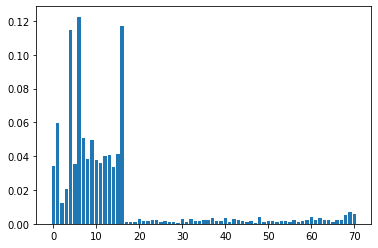

In [7]:
# treinando novamente o melhor modelo
def avaliar_features(melhor_modelo):
    model = melhor_modelo[1]
    model.fit(X_train, y_train)
    importance = model.feature_importances_
    colunas = df_churn_tratado.columns

    # summarize feature importance
    for i,v in enumerate(importance):
        print('%s: %.5f' % (colunas[i],v))

    # plot feature importance
    plt.bar([x for x in range(len(importance))], importance)
    plt.show()
    
avaliar_features(melhor_modelo)

### Apagando as colunas com empenho reduzido e refazendo os testes
Avaliando a relevancia das colunas, percebemos que 'area_code', 'state' tem baixissima relevancia.


In [8]:
col_colineares = ['area_code', 'state']
df_churn_tratado = df_churn_train.drop(col_colineares, axis = 1)
X_train, X_test, y_train, y_test = obter_treino_teste(df_churn_tratado)

melhor_modelo = rodar_modelo(models)
print('')
print('Melhor modelo:', melhor_modelo[1])

Resultado da avaiação
  LR: media 0.760000 (dp 0.018371 - max 0.775000)
  LDA: media 0.756250 (dp 0.017678 - max 0.787500)
  KNN: media 0.807500 (dp 0.028339 - max 0.850000)
  DTC: media 0.856250 (dp 0.020156 - max 0.881250)
  GB: media 0.798750 (dp 0.028339 - max 0.843750)
  SVM: media 0.837500 (dp 0.014252 - max 0.856250)
  RF: media 0.875000 (dp 0.031623 - max 0.912500)
  GPC: media 0.842500 (dp 0.026041 - max 0.875000)
  AB: media 0.800000 (dp 0.037914 - max 0.843750)
  GBC: media 0.878750 (dp 0.030516 - max 0.918750)

Melhor modelo: GradientBoostingClassifier()


account_length: 0.01321
international_plan: 0.15534
voice_mail_plan: 0.01027
number_vmail_messages: 0.02749
total_day_minutes: 0.14513
total_day_calls: 0.00563
total_day_charge: 0.15472
total_eve_minutes: 0.06015
total_eve_calls: 0.02228
total_eve_charge: 0.02718
total_night_minutes: 0.01431
total_night_calls: 0.01376
total_night_charge: 0.00833
total_intl_minutes: 0.03243
total_intl_calls: 0.03875
total_intl_charge: 0.02219
number_customer_service_calls: 0.24883


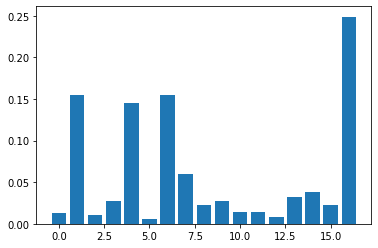

In [9]:
# Avaliando novamente
avaliar_features(melhor_modelo)

Com o o dataset refinado, o algoritmo **RandomForestClassifier** passa a ter um desempenho superior.  
Com isso vamos seguir para a próxima etapa, que será um ajuste fino dos hyperparametros.

### Refinando os melhores modelos

RandomForestClassifier GIRD
  criterion :  entropy
  max_depth :  None
  max_features :  auto
  min_samples_leaf :  3
  min_samples_split :  2
  n_estimators :  100
  random_state :  None

AVALIAÇÃO PRINCIPAL
   Test Accuracy Score: 174.00

OUTROS INDICADORES
              precision    recall  f1-score   support

    Abandono       0.83      0.93      0.87        97
Não Abandono       0.92      0.82      0.87       103

    accuracy                           0.87       200
   macro avg       0.87      0.87      0.87       200
weighted avg       0.88      0.87      0.87       200



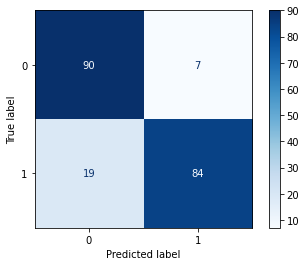

In [10]:
from sklearn.model_selection import GridSearchCV

gsc = GridSearchCV(
        estimator=RandomForestClassifier(),
        param_grid={
            'random_state': [None, 0, 1, 2, 3],
            'max_depth': [None, 1, 2, 3, 4, 15, 20],
            'n_estimators': [5, 10, 100, 150, 200], 
            'max_features': ['auto', 'sqrt', 'log2', 1, 2, 3],
            'criterion': ['gini', 'entropy'],
            'min_samples_split': [2, 4, 6],
            'min_samples_leaf': [3,4,5]
        },
        cv=5, scoring='accuracy', verbose=0, n_jobs=-1)

grid_result = gsc.fit(X_train, y_train.ravel())
best_params = grid_result.best_params_
classifier = RandomForestClassifier(max_depth=best_params["max_depth"], random_state=best_params["random_state"],
                                   n_estimators = best_params["n_estimators"], max_features = best_params["max_features"],
                                   criterion= best_params["criterion"], min_samples_split=best_params["min_samples_split"],
                                   min_samples_leaf = best_params["min_samples_leaf"])

model = classifier.fit(X_train, y_train.ravel())
y_pred = model.predict(X_test) # avaliando o melhor estimador

print("RandomForestClassifier GIRD")
for k, v in best_params.items():
    print(' ', k, ': ',  v)

print('')

print_status_classifier(model,classifier, X_train, y_train, X_test, y_test, y_pred)

### Fazer a avaliação de Overfitting

### Fontes
SKLEARN CLASSIFIERS  
https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html

Choosing a Scikit-learn Linear Regression Algorithm  
https://towardsdatascience.com/choosing-a-scikit-learn-linear-regression-algorithm-dd96b48105f5

Livro: Python Data Science Handbook - VanderPlas, Jake - O'REILLY  
Disponível em: https://github.com/jakevdp/PythonDataScienceHandbook

Artigos sobre Machine Learning Disponíveis em  
https://towardsdatascience.com/  
https://medium.com/  
https://kaggle.com/  